In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

In [3]:
# KIT corporate colors
# white,      255 255 255,    #ffffff
# black,      0 0 0,          #000000
# green,      0 150 130,      #009682
# blue,       0 100 170,      #4664aa
# maygreen,   140 182 60,     #8cb63c
# yellow,     252 229 0,      #fce500
# orange,     223 155 27,     #df9b1b
# brown,      167 130 46,     #a7822e
# red,        162 34 35,      #a22223
# purple,     163 16 124,     #a3107c
# cyan,       35 161 224,     #23a1e0

## Few Shot

In [4]:
#read all 
predictions_5 = pd.read_csv(os.path.join("few_shot/classes_5","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_5","results.json"), "r") as f:
        report_5 = json.load(f)

predictions_10 = pd.read_csv(os.path.join("few_shot/classes_10","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_10","results.json"), "r") as f:
        report_10 = json.load(f)

predictions_20 = pd.read_csv(os.path.join("few_shot/classes_20","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_20","results.json"), "r") as f:
        report_20 = json.load(f)

predictions_30 = pd.read_csv(os.path.join("few_shot/classes_30","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_30","results.json"), "r") as f:
        report_30 = json.load(f)

predictions_40 = pd.read_csv(os.path.join("few_shot/classes_40","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_40","results.json"), "r") as f:
        report_40 = json.load(f)

predictions_50 = pd.read_csv(os.path.join("few_shot/classes_50","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_50","results.json"), "r") as f:
        report_50 = json.load(f)

5 classes:  0.85
10 classes:  0.615
20 classes:  0.48375
30 classes:  0.3333333333333333
40 classes:  0.328125
50 classes:  0.271


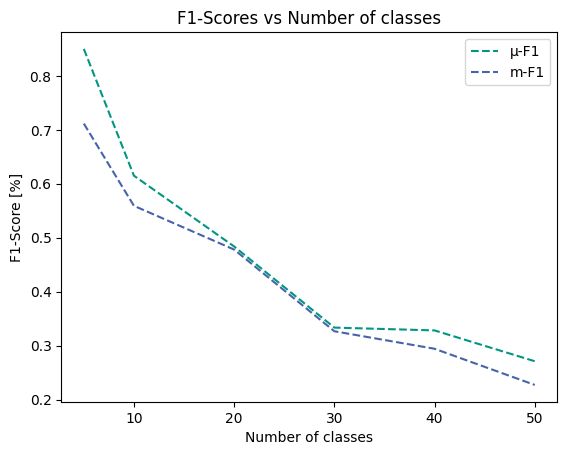

5 classes:  175.855
10 classes:  272.615
20 classes:  446.965
30 classes:  675.305
40 classes:  910.53625
50 classes:  1099.3275


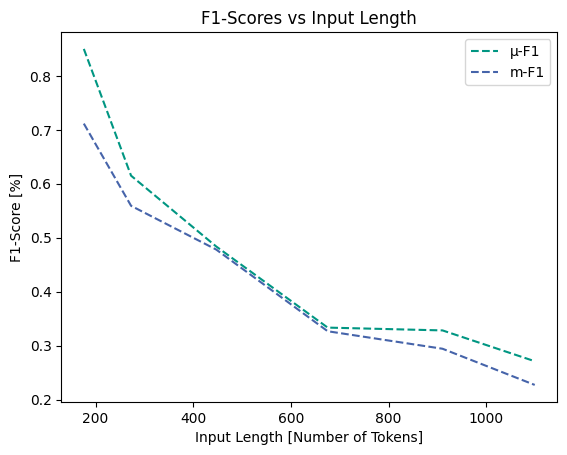

In [5]:
#print all accuracies
print("5 classes: ", report_5["accuracy"])
print("10 classes: ", report_10["accuracy"])
print("20 classes: ", report_20["accuracy"])
print("30 classes: ", report_30["accuracy"])
print("40 classes: ", report_40["accuracy"])
print("50 classes: ", report_50["accuracy"])

#plot accuracies vs number of classes
macro_f1_scores = [report_5["macro avg"]["f1-score"], report_10["macro avg"]["f1-score"], report_20["macro avg"]["f1-score"], report_30["macro avg"]["f1-score"], report_40["macro avg"]["f1-score"], report_50["macro avg"]["f1-score"]]

plt.plot([5,10,20,30,40,50], [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]], color="#009682", label="µ-F1", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores, color="#4664aa", linestyle="--", label="m-F1")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("F1-Scores vs Number of classes")
plt.legend()
plt.gcf().savefig("few_shot/figs/performance_vs_number_classes.png")
plt.show()

#get the average input_tokens_length
print("5 classes: ", predictions_5["input_tokens_length"].mean())
print("10 classes: ", predictions_10["input_tokens_length"].mean())
print("20 classes: ", predictions_20["input_tokens_length"].mean())
print("30 classes: ", predictions_30["input_tokens_length"].mean())
print("40 classes: ", predictions_40["input_tokens_length"].mean())
print("50 classes: ", predictions_50["input_tokens_length"].mean())

#plot accuracies vs input_tokens_length
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]], color="#009682", label="µ-F1", linestyle="--")
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], macro_f1_scores, color="#4664aa", linestyle="--", label="m-F1")
plt.xlabel("Input Length [Number of Tokens]")
plt.ylabel("F1-Score [%]")
plt.title("F1-Scores vs Input Length") 
plt.legend()
plt.gcf().savefig("few_shot/figs/performance_vs_input_tokens_length.png")
plt.show()



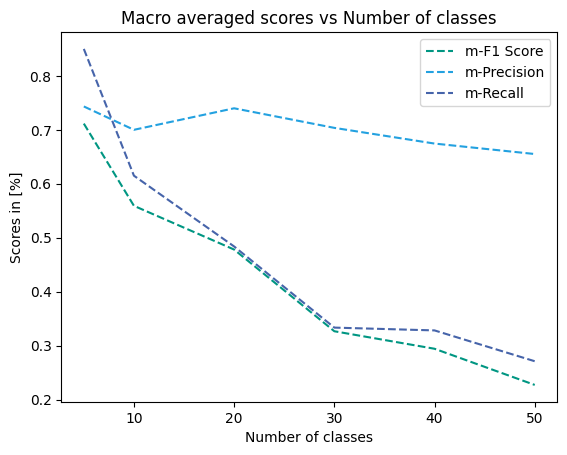

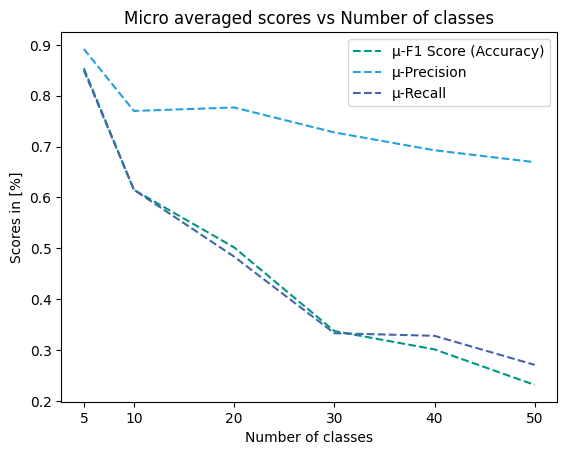

In [56]:
macro_f1_scores = [report_5["macro avg"]["f1-score"], report_10["macro avg"]["f1-score"], report_20["macro avg"]["f1-score"], report_30["macro avg"]["f1-score"], report_40["macro avg"]["f1-score"], report_50["macro avg"]["f1-score"]]
macro_recalls = [report_5["macro avg"]["recall"], report_10["macro avg"]["recall"], report_20["macro avg"]["recall"], report_30["macro avg"]["recall"], report_40["macro avg"]["recall"], report_50["macro avg"]["recall"]]
macro_precisions = [report_5["macro avg"]["precision"], report_10["macro avg"]["precision"], report_20["macro avg"]["precision"], report_30["macro avg"]["precision"], report_40["macro avg"]["precision"], report_50["macro avg"]["precision"]]
plt.plot([5,10,20,30,40,50], macro_f1_scores, label="m-F1 Score", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_precisions, label="m-Precision", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_recalls, label="m-Recall", color="#4664aa", linestyle="--")


plt.xlabel("Number of classes")
plt.ylabel("Scores in [%]")
plt.title("Macro averaged scores vs Number of classes")
plt.legend()
plt.gcf().savefig("few_shot/figs/macro_avg_scores_vs_number_of_classes.png")
plt.show()



weighted_f1_scores = [report_5["weighted avg"]["f1-score"], report_10["weighted avg"]["f1-score"], report_20["weighted avg"]["f1-score"], report_30["weighted avg"]["f1-score"], report_40["weighted avg"]["f1-score"], report_50["weighted avg"]["f1-score"]]
weighted_recalls = [report_5["weighted avg"]["recall"], report_10["weighted avg"]["recall"], report_20["weighted avg"]["recall"], report_30["weighted avg"]["recall"], report_40["weighted avg"]["recall"], report_50["weighted avg"]["recall"]]
weighted_precisions = [report_5["weighted avg"]["precision"], report_10["weighted avg"]["precision"], report_20["weighted avg"]["precision"], report_30["weighted avg"]["precision"], report_40["weighted avg"]["precision"], report_50["weighted avg"]["precision"]]
plt.plot([5,10,20,30,40,50], weighted_f1_scores, label="µ-F1 Score (Accuracy)", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], weighted_precisions, label="µ-Precision", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], weighted_recalls, label="µ-Recall", color="#4664aa", linestyle="--")

plt.xticks([5,10,20,30,40,50])


plt.xlabel("Number of classes")
plt.ylabel("Scores in [%]")
plt.title("Micro averaged scores vs Number of classes")
plt.legend()
plt.gcf().savefig("few_shot/figs/micro_avg_scores_vs_number_of_classes_extensive.png")
plt.show()


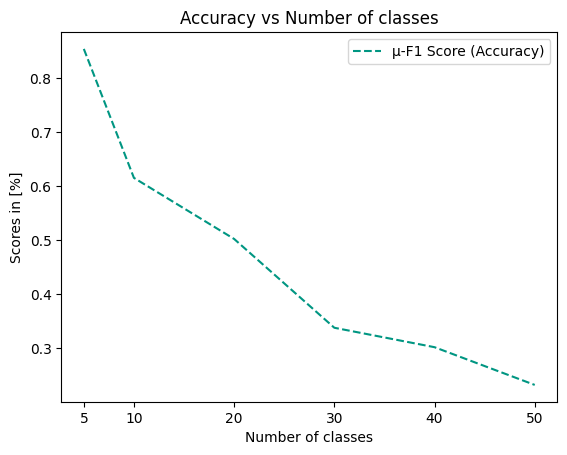

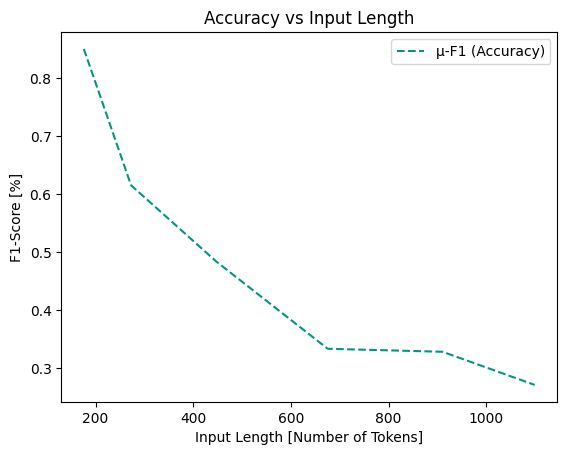

In [55]:
weighted_f1_scores = [report_5["weighted avg"]["f1-score"], report_10["weighted avg"]["f1-score"], report_20["weighted avg"]["f1-score"], report_30["weighted avg"]["f1-score"], report_40["weighted avg"]["f1-score"], report_50["weighted avg"]["f1-score"]]
weighted_recalls = [report_5["weighted avg"]["recall"], report_10["weighted avg"]["recall"], report_20["weighted avg"]["recall"], report_30["weighted avg"]["recall"], report_40["weighted avg"]["recall"], report_50["weighted avg"]["recall"]]
weighted_precisions = [report_5["weighted avg"]["precision"], report_10["weighted avg"]["precision"], report_20["weighted avg"]["precision"], report_30["weighted avg"]["precision"], report_40["weighted avg"]["precision"], report_50["weighted avg"]["precision"]]
plt.plot([5,10,20,30,40,50], weighted_f1_scores, label="µ-F1 Score (Accuracy)", color="#009682", linestyle="--")
# plt.plot([5,10,20,30,40,50], weighted_precisions, label="µ-Precision", color="#23a1e0", linestyle="--")
# plt.plot([5,10,20,30,40,50], weighted_recalls, label="µ-Recall", color="#4664aa", linestyle="--")

plt.xticks([5,10,20,30,40,50])


plt.xlabel("Number of classes")
plt.ylabel("Scores in [%]")
plt.title("Accuracy vs Number of classes")
plt.legend()
plt.gcf().savefig("few_shot/figs/micro_avg_scores_vs_number_of_classes.png")
plt.show()


#plot accuracies vs input_tokens_length
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]], color="#009682", label="µ-F1 Score (Accuracy)", linestyle="--")
plt.xlabel("Input Length [Number of Tokens]")
plt.ylabel("F1-Score [%]")
plt.title("Accuracy vs Input Length") 
plt.legend()
plt.gcf().savefig("few_shot/figs/micro_avg_scores_vs_input_tokens_length.png")
plt.show()


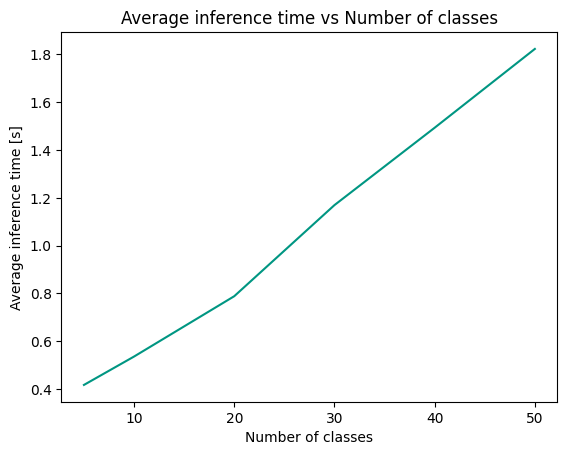

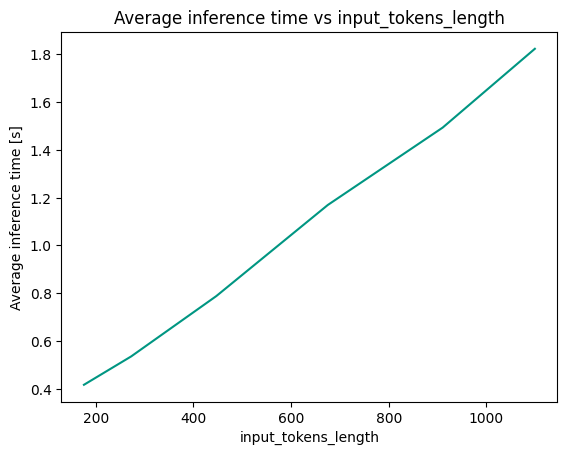

In [7]:
# plot the average inference time vs number of classes
plt.plot([5,10,20,30,40,50],[predictions_5["inference_time"].mean(), predictions_10["inference_time"].mean(), predictions_20["inference_time"].mean(), predictions_30["inference_time"].mean(), predictions_40["inference_time"].mean(), predictions_50["inference_time"].mean()], color="#009682" )
plt.xlabel("Number of classes")
plt.ylabel("Average inference time [s]")
plt.title("Average inference time vs Number of classes")
plt.gcf().savefig("few_shot/figs/average_inference_time_vs_number_of_classes.png")
plt.show()


# plot the average inference time vs input_tokens_length
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], [predictions_5["inference_time"].mean(), predictions_10["inference_time"].mean(), predictions_20["inference_time"].mean(), predictions_30["inference_time"].mean(), predictions_40["inference_time"].mean(), predictions_50["inference_time"].mean()] , color="#009682")
plt.xlabel("input_tokens_length")
plt.ylabel("Average inference time [s]")
plt.title("Average inference time vs input_tokens_length")
plt.gcf().savefig("few_shot/figs/average_inference_time_vs_input_tokens_length.png")
plt.show()


#### In-Depth Analysis of Results

In [8]:
predictions_5.isna().sum()

text                   0
label                  0
prediction             4
inference_time         0
input_tokens_length    0
prompt_length          0
prompt                 0
dtype: int64

5 classes:  4
10 classes:  0
20 classes:  86
30 classes:  78
40 classes:  113
50 classes:  66


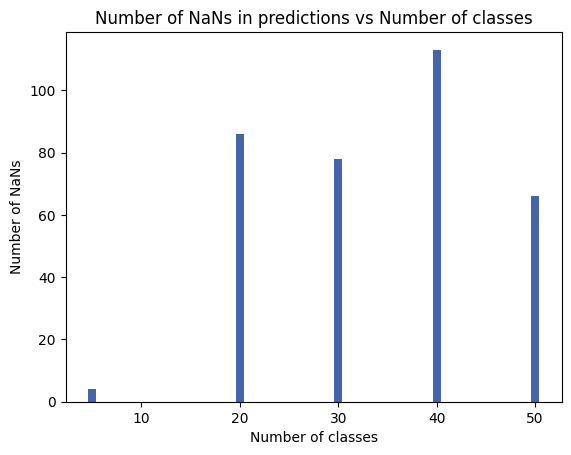

In [9]:
# print number of nans in prediction for each 
print("5 classes: ", predictions_5["prediction"].isna().sum())
print("10 classes: ", predictions_10["prediction"].isna().sum())
print("20 classes: ", predictions_20["prediction"].isna().sum())
print("30 classes: ", predictions_30["prediction"].isna().sum())
print("40 classes: ", predictions_40["prediction"].isna().sum())
print("50 classes: ", predictions_50["prediction"].isna().sum())


#plot them 
lengths = [predictions_5.shape[0], predictions_10.shape[0], predictions_20.shape[0], predictions_30.shape[0], predictions_40.shape[0], predictions_50.shape[0]]
nans = [predictions_5["prediction"].isna().sum(), predictions_10["prediction"].isna().sum(), predictions_20["prediction"].isna().sum(), predictions_30["prediction"].isna().sum(), predictions_40["prediction"].isna().sum(), predictions_50["prediction"].isna().sum()]
# plot the length of predictions
#plt.bar([5,10,20,30,40,50], lengths, color="#009682")
# plot the number of nans
plt.bar([5,10,20,30,40,50], nans, color="#4664aa")
plt.xlabel("Number of classes")
plt.ylabel("Number of NaNs")
plt.title("Number of NaNs in predictions vs Number of classes")
plt.gcf().savefig("few_shot/figs/number_of_nans_vs_number_of_classes.png")
plt.show()



In [10]:
predictions_5["prediction"].fillna(-1, inplace=False).astype(int)
fails_5 = predictions_5[predictions_5["prediction"] != predictions_5["label"]]

predictions_10["prediction"].fillna(-1, inplace=False).astype(int)
fails_10 = predictions_10[predictions_10["prediction"] != predictions_10["label"]].fillna(-1)

predictions_20["prediction"].fillna(-1, inplace=False).astype(int)
fails_20 = predictions_20[predictions_20["prediction"] != predictions_20["label"]].fillna(-1)

predictions_30["prediction"].fillna(-1, inplace=False).astype(int)
fails_30 = predictions_30[predictions_30["prediction"] != predictions_30["label"]].fillna(-1)

predictions_40["prediction"].fillna(-1, inplace=False).astype(int)
fails_40 = predictions_40[predictions_40["prediction"] != predictions_40["label"]].fillna(-1)

predictions_50["prediction"].fillna(-1, inplace=False).astype(int)
fails_50 = predictions_50[predictions_50["prediction"] != predictions_50["label"]].fillna(-1)


In [11]:
fails_5['prediction'].value_counts()

#how many percent of this fails have the prediction -1
print("Percentage of errors due to invalid label",fails_5[fails_5["prediction"] == -1].shape[0]/fails_5.shape[0])
print("Percentage of errors due to invalid label",fails_10[fails_10["prediction"] == -1].shape[0]/fails_10.shape[0])
print("Percentage of errors due to invalid label",fails_20[fails_20["prediction"] == -1].shape[0]/fails_20.shape[0])
print("Percentage of errors due to invalid label",fails_30[fails_30["prediction"] == -1].shape[0]/fails_30.shape[0])
print("Percentage of errors due to invalid label",fails_40[fails_40["prediction"] == -1].shape[0]/fails_40.shape[0])




Percentage of errors due to invalid label 0.0
Percentage of errors due to invalid label 0.33116883116883117
Percentage of errors due to invalid label 0.20823244552058112
Percentage of errors due to invalid label 0.0975
Percentage of errors due to invalid label 0.10511627906976745


In [12]:
predictions_20["prediction"].fillna(-1, inplace=False).astype(int)
fails_20 = predictions_20[predictions_20["prediction"] != predictions_20["label"]]
fails_20['prediction']

0      41.0
1      41.0
2      41.0
4       NaN
5      41.0
       ... 
778     NaN
782     NaN
783     1.0
784     NaN
796     NaN
Name: prediction, Length: 413, dtype: float64

In [13]:
predictions_10["label"].value_counts()

label
17    40
34    40
15    40
27    40
25    40
53    40
21    40
7     40
59    40
5     40
Name: count, dtype: int64

## Cosine Similarity Selector

In [14]:
# read all for classes 5
predictions_classes_5_faiss_1 = pd.read_csv(os.path.join("enhanced_few_shot/classes_5_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_5_faiss_1","results.json"), "r") as f:
        report_classes_5_faiss_1 = json.load(f)
predictions_classes_5_faiss_3 = pd.read_csv(os.path.join("enhanced_few_shot/classes_5_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_5_faiss_3","results.json"), "r") as f:
        report_classes_5_faiss_3 = json.load(f)
predictions_classes_5_faiss_5 = pd.read_csv(os.path.join("enhanced_few_shot/classes_5_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_5_faiss_5","results.json"), "r") as f:
        report_classes_5_faiss_5 = json.load(f)
predictions_classes_5_faiss_10 = pd.read_csv(os.path.join("enhanced_few_shot/classes_5_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_5_faiss_10","results.json"), "r") as f:
        report_classes_5_faiss_10 = json.load(f)

# read all for classes 10
predictions_classes_10_faiss_1 = pd.read_csv(os.path.join("enhanced_few_shot/classes_10_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_10_faiss_1","results.json"), "r") as f:
        report_classes_10_faiss_1 = json.load(f)
predictions_classes_10_faiss_3 = pd.read_csv(os.path.join("enhanced_few_shot/classes_10_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_10_faiss_3","results.json"), "r") as f:
        report_classes_10_faiss_3 = json.load(f)
predictions_classes_10_faiss_5 = pd.read_csv(os.path.join("enhanced_few_shot/classes_10_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_10_faiss_5","results.json"), "r") as f:
        report_classes_10_faiss_5 = json.load(f)
predictions_classes_10_faiss_10 = pd.read_csv(os.path.join("enhanced_few_shot/classes_10_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_10_faiss_10","results.json"), "r") as f:
        report_classes_10_faiss_10 = json.load(f)

# read all for classes 20
predictions_classes_20_faiss_1 = pd.read_csv(os.path.join("enhanced_few_shot/classes_20_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_20_faiss_1","results.json"), "r") as f:
        report_classes_20_faiss_1 = json.load(f)
predictions_classes_20_faiss_3 = pd.read_csv(os.path.join("enhanced_few_shot/classes_20_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_20_faiss_3","results.json"), "r") as f:
        report_classes_20_faiss_3 = json.load(f)
predictions_classes_20_faiss_5 = pd.read_csv(os.path.join("enhanced_few_shot/classes_20_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_20_faiss_5","results.json"), "r") as f:
        report_classes_20_faiss_5 = json.load(f)
predictions_classes_20_faiss_10 = pd.read_csv(os.path.join("enhanced_few_shot/classes_20_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_20_faiss_10","results.json"), "r") as f:
        report_classes_20_faiss_10 = json.load(f)

# read all for classes 30
predictions_classes_30_faiss_1 = pd.read_csv(os.path.join("enhanced_few_shot/classes_30_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_30_faiss_1","results.json"), "r") as f:
        report_classes_30_faiss_1 = json.load(f)
predictions_classes_30_faiss_3 = pd.read_csv(os.path.join("enhanced_few_shot/classes_30_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_30_faiss_3","results.json"), "r") as f:
        report_classes_30_faiss_3 = json.load(f)
predictions_classes_30_faiss_5 = pd.read_csv(os.path.join("enhanced_few_shot/classes_30_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_30_faiss_5","results.json"), "r") as f:
        report_classes_30_faiss_5 = json.load(f)
predictions_classes_30_faiss_10 = pd.read_csv(os.path.join("enhanced_few_shot/classes_30_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_30_faiss_10","results.json"), "r") as f:
        report_classes_30_faiss_10 = json.load(f)

# read all for classes 40
predictions_classes_40_faiss_1 = pd.read_csv(os.path.join("enhanced_few_shot/classes_40_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_40_faiss_1","results.json"), "r") as f:
        report_classes_40_faiss_1 = json.load(f)
predictions_classes_40_faiss_3 = pd.read_csv(os.path.join("enhanced_few_shot/classes_40_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_40_faiss_3","results.json"), "r") as f:
        report_classes_40_faiss_3 = json.load(f)
predictions_classes_40_faiss_5 = pd.read_csv(os.path.join("enhanced_few_shot/classes_40_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_40_faiss_5","results.json"), "r") as f:
        report_classes_40_faiss_5 = json.load(f)
predictions_classes_40_faiss_10 = pd.read_csv(os.path.join("enhanced_few_shot/classes_40_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_40_faiss_10","results.json"), "r") as f:
        report_classes_40_faiss_10 = json.load(f)

# read all for classes 50
predictions_classes_50_faiss_1 = pd.read_csv(os.path.join("enhanced_few_shot/classes_50_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_50_faiss_1","results.json"), "r") as f:
        report_classes_50_faiss_1 = json.load(f)
predictions_classes_50_faiss_3 = pd.read_csv(os.path.join("enhanced_few_shot/classes_50_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_50_faiss_3","results.json"), "r") as f:
        report_classes_50_faiss_3 = json.load(f)
predictions_classes_50_faiss_5 = pd.read_csv(os.path.join("enhanced_few_shot/classes_50_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_50_faiss_5","results.json"), "r") as f:
        report_classes_50_faiss_5 = json.load(f)
predictions_classes_50_faiss_10 = pd.read_csv(os.path.join("enhanced_few_shot/classes_50_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("enhanced_few_shot/classes_50_faiss_10","results.json"), "r") as f:
        report_classes_50_faiss_10 = json.load(f)

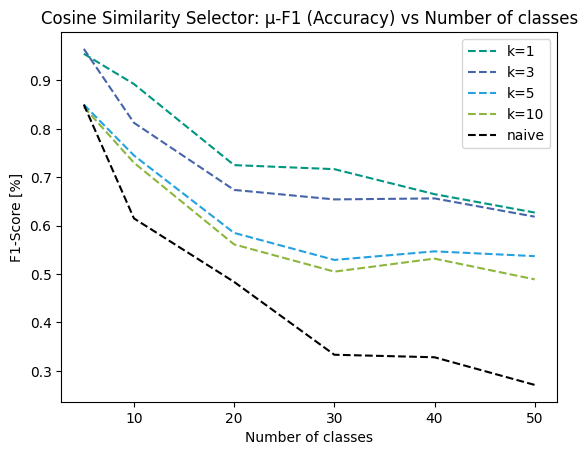

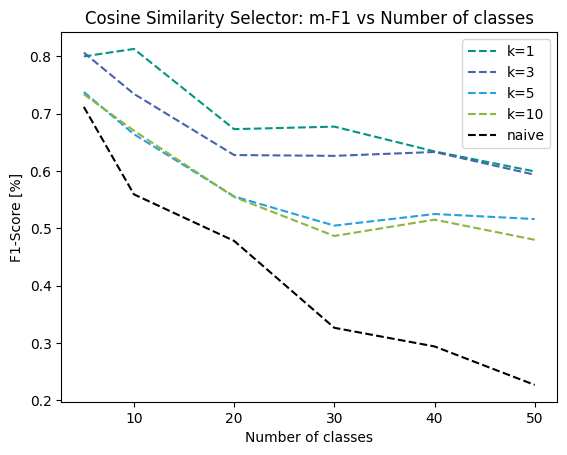

In [15]:
#plot accuracies vs number of classes for all faiss
micro_f1_scores_faiss_1 = [report_classes_5_faiss_1["accuracy"], report_classes_10_faiss_1["accuracy"], report_classes_20_faiss_1["accuracy"], report_classes_30_faiss_1["accuracy"], report_classes_40_faiss_1["accuracy"], report_classes_50_faiss_1["accuracy"]]
micro_f1_scores_faiss_3 = [report_classes_5_faiss_3["accuracy"], report_classes_10_faiss_3["accuracy"], report_classes_20_faiss_3["accuracy"], report_classes_30_faiss_3["accuracy"], report_classes_40_faiss_3["accuracy"], report_classes_50_faiss_3["accuracy"]]
micro_f1_scores_faiss_5 = [report_classes_5_faiss_5["accuracy"], report_classes_10_faiss_5["accuracy"], report_classes_20_faiss_5["accuracy"], report_classes_30_faiss_5["accuracy"], report_classes_40_faiss_5["accuracy"], report_classes_50_faiss_5["accuracy"]]
micro_f1_scores_faiss_10 = [report_classes_5_faiss_10["accuracy"], report_classes_10_faiss_10["accuracy"], report_classes_20_faiss_10["accuracy"], report_classes_30_faiss_10["accuracy"], report_classes_40_faiss_10["accuracy"], report_classes_50_faiss_10["accuracy"]]
micro_f1_scores = [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]]

plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_1, label="k=1", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_3, label="k=3", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_5, label="k=5", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_10, label="k=10", color="#8cb63c", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("Cosine Similarity Selector: µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("enhanced_few_shot/figs/performance_vs_number_classes_faiss.png")
plt.show()

#repeat for macro
macro_f1_scores_faiss_1 = [report_classes_5_faiss_1["macro avg"]["f1-score"], report_classes_10_faiss_1["macro avg"]["f1-score"], report_classes_20_faiss_1["macro avg"]["f1-score"], report_classes_30_faiss_1["macro avg"]["f1-score"], report_classes_40_faiss_1["macro avg"]["f1-score"], report_classes_50_faiss_1["macro avg"]["f1-score"]]
macro_f1_scores_faiss_3 = [report_classes_5_faiss_3["macro avg"]["f1-score"], report_classes_10_faiss_3["macro avg"]["f1-score"], report_classes_20_faiss_3["macro avg"]["f1-score"], report_classes_30_faiss_3["macro avg"]["f1-score"], report_classes_40_faiss_3["macro avg"]["f1-score"], report_classes_50_faiss_3["macro avg"]["f1-score"]]
macro_f1_scores_faiss_5 = [report_classes_5_faiss_5["macro avg"]["f1-score"], report_classes_10_faiss_5["macro avg"]["f1-score"], report_classes_20_faiss_5["macro avg"]["f1-score"], report_classes_30_faiss_5["macro avg"]["f1-score"], report_classes_40_faiss_5["macro avg"]["f1-score"], report_classes_50_faiss_5["macro avg"]["f1-score"]]
macro_f1_scores_faiss_10 = [report_classes_5_faiss_10["macro avg"]["f1-score"], report_classes_10_faiss_10["macro avg"]["f1-score"], report_classes_20_faiss_10["macro avg"]["f1-score"], report_classes_30_faiss_10["macro avg"]["f1-score"], report_classes_40_faiss_10["macro avg"]["f1-score"], report_classes_50_faiss_10["macro avg"]["f1-score"]]
macro_f1_scores = [report_5["macro avg"]["f1-score"], report_10["macro avg"]["f1-score"], report_20["macro avg"]["f1-score"], report_30["macro avg"]["f1-score"], report_40["macro avg"]["f1-score"], report_50["macro avg"]["f1-score"]]

plt.plot([5,10,20,30,40,50], macro_f1_scores_faiss_1, label="k=1", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores_faiss_3, label="k=3", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores_faiss_5, label="k=5", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores_faiss_10, label="k=10", color="#8cb63c", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("Cosine Similarity Selector: m-F1 vs Number of classes")
plt.legend()
plt.gcf().savefig("enhanced_few_shot/figs/macro_avg_scores_vs_number_of_classes_faiss.png")
plt.show()




### MMR Selector

In [16]:
# read all for classes 5
predictions_mmr_classes_5_faiss_1 = pd.read_csv(os.path.join("mmr_few_shot/classes_5_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_5_faiss_1","results.json"), "r") as f:
        report_mmr_classes_5_faiss_1 = json.load(f)
predictions_mmr_classes_5_faiss_3 = pd.read_csv(os.path.join("mmr_few_shot/classes_5_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_5_faiss_3","results.json"), "r") as f:
        report_mmr_classes_5_faiss_3 = json.load(f)
predictions_mmr_classes_5_faiss_5 = pd.read_csv(os.path.join("mmr_few_shot/classes_5_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_5_faiss_5","results.json"), "r") as f:
        report_mmr_classes_5_faiss_5 = json.load(f)
predictions_mmr_classes_5_faiss_10 = pd.read_csv(os.path.join("mmr_few_shot/classes_5_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_5_faiss_10","results.json"), "r") as f:
        report_mmr_classes_5_faiss_10 = json.load(f)


# read all for classes 10
predictions_mmr_classes_10_faiss_1 = pd.read_csv(os.path.join("mmr_few_shot/classes_10_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_10_faiss_1","results.json"), "r") as f:
        report_mmr_classes_10_faiss_1 = json.load(f)
predictions_mmr_classes_10_faiss_3 = pd.read_csv(os.path.join("mmr_few_shot/classes_10_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_10_faiss_3","results.json"), "r") as f:
        report_mmr_classes_10_faiss_3 = json.load(f)
predictions_mmr_classes_10_faiss_5 = pd.read_csv(os.path.join("mmr_few_shot/classes_10_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_10_faiss_5","results.json"), "r") as f:
        report_mmr_classes_10_faiss_5 = json.load(f)
predictions_mmr_classes_10_faiss_10 = pd.read_csv(os.path.join("mmr_few_shot/classes_10_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_10_faiss_10","results.json"), "r") as f:
        report_mmr_classes_10_faiss_10 = json.load(f)
        

# read all for classes 20
predictions_mmr_classes_20_faiss_1 = pd.read_csv(os.path.join("mmr_few_shot/classes_20_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_20_faiss_1","results.json"), "r") as f:
        report_mmr_classes_20_faiss_1 = json.load(f)
predictions_mmr_classes_20_faiss_3 = pd.read_csv(os.path.join("mmr_few_shot/classes_20_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_20_faiss_3","results.json"), "r") as f:
        report_mmr_classes_20_faiss_3 = json.load(f)
predictions_mmr_classes_20_faiss_5 = pd.read_csv(os.path.join("mmr_few_shot/classes_20_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_20_faiss_5","results.json"), "r") as f:
        report_mmr_classes_20_faiss_5 = json.load(f)
predictions_mmr_classes_20_faiss_10 = pd.read_csv(os.path.join("mmr_few_shot/classes_20_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_20_faiss_10","results.json"), "r") as f:
        report_mmr_classes_20_faiss_10 = json.load(f)

# read all for classes 30
predictions_mmr_classes_30_faiss_1 = pd.read_csv(os.path.join("mmr_few_shot/classes_30_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_30_faiss_1","results.json"), "r") as f:
        report_mmr_classes_30_faiss_1 = json.load(f)
predictions_mmr_classes_30_faiss_3 = pd.read_csv(os.path.join("mmr_few_shot/classes_30_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_30_faiss_3","results.json"), "r") as f:
        report_mmr_classes_30_faiss_3 = json.load(f)
predictions_mmr_classes_30_faiss_5 = pd.read_csv(os.path.join("mmr_few_shot/classes_30_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_30_faiss_5","results.json"), "r") as f:
        report_mmr_classes_30_faiss_5 = json.load(f)
predictions_mmr_classes_30_faiss_10 = pd.read_csv(os.path.join("mmr_few_shot/classes_30_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_30_faiss_10","results.json"), "r") as f:
        report_mmr_classes_30_faiss_10 = json.load(f)

# read all for classes 40
predictions_mmr_classes_40_faiss_1 = pd.read_csv(os.path.join("mmr_few_shot/classes_40_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_40_faiss_1","results.json"), "r") as f:
        report_mmr_classes_40_faiss_1 = json.load(f)
predictions_mmr_classes_40_faiss_3 = pd.read_csv(os.path.join("mmr_few_shot/classes_40_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_40_faiss_3","results.json"), "r") as f:
        report_mmr_classes_40_faiss_3 = json.load(f)
predictions_mmr_classes_40_faiss_5 = pd.read_csv(os.path.join("mmr_few_shot/classes_40_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_40_faiss_5","results.json"), "r") as f:
        report_mmr_classes_40_faiss_5 = json.load(f)
predictions_mmr_classes_40_faiss_10 = pd.read_csv(os.path.join("mmr_few_shot/classes_40_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_40_faiss_10","results.json"), "r") as f:
        report_mmr_classes_40_faiss_10 = json.load(f)

# read all for classes 50
predictions_mmr_classes_50_faiss_1 = pd.read_csv(os.path.join("mmr_few_shot/classes_50_faiss_1","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_50_faiss_1","results.json"), "r") as f:
        report_mmr_classes_50_faiss_1 = json.load(f)
predictions_mmr_classes_50_faiss_3 = pd.read_csv(os.path.join("mmr_few_shot/classes_50_faiss_3","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_50_faiss_3","results.json"), "r") as f:
        report_mmr_classes_50_faiss_3 = json.load(f)
predictions_mmr_classes_50_faiss_5 = pd.read_csv(os.path.join("mmr_few_shot/classes_50_faiss_5","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_50_faiss_5","results.json"), "r") as f:
        report_mmr_classes_50_faiss_5 = json.load(f)
predictions_mmr_classes_50_faiss_10 = pd.read_csv(os.path.join("mmr_few_shot/classes_50_faiss_10","predictions.csv"), index_col=False)
with open(os.path.join("mmr_few_shot/classes_50_faiss_10","results.json"), "r") as f:
        report_mmr_classes_50_faiss_10 = json.load(f)

        

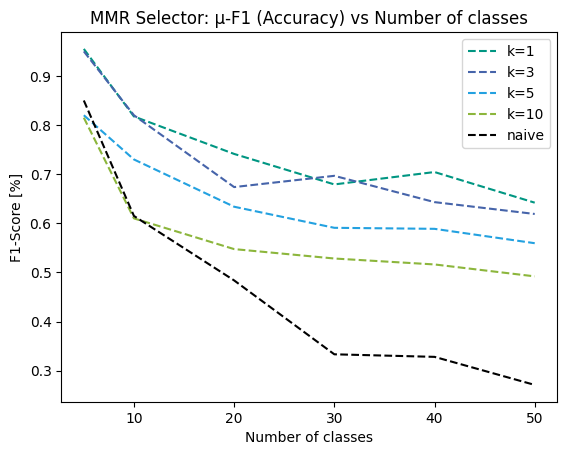

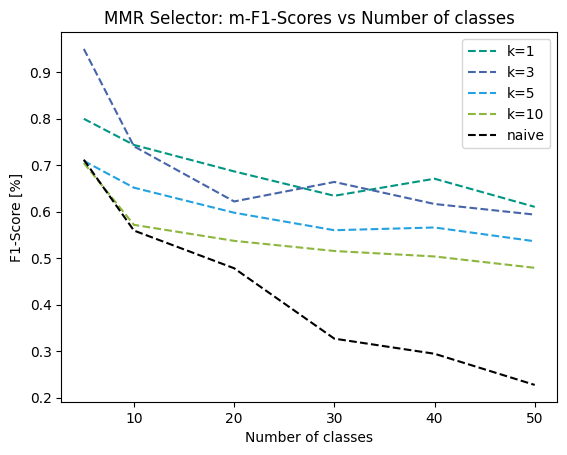

In [17]:

micro_f1_scores = [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]]

micro_mmr_f1_scores_faiss_1 = [report_mmr_classes_5_faiss_1["accuracy"], report_mmr_classes_10_faiss_1["accuracy"], report_mmr_classes_20_faiss_1["accuracy"], report_mmr_classes_30_faiss_1["accuracy"], report_mmr_classes_40_faiss_1["accuracy"], report_mmr_classes_50_faiss_1["accuracy"]]
micro_mmr_f1_scores_faiss_3 = [report_mmr_classes_5_faiss_3["accuracy"], report_mmr_classes_10_faiss_3["accuracy"], report_mmr_classes_20_faiss_3["accuracy"], report_mmr_classes_30_faiss_3["accuracy"], report_mmr_classes_40_faiss_3["accuracy"], report_mmr_classes_50_faiss_3["accuracy"]]
micro_mmr_f1_scores_faiss_5 = [report_mmr_classes_5_faiss_5["accuracy"], report_mmr_classes_10_faiss_5["accuracy"], report_mmr_classes_20_faiss_5["accuracy"], report_mmr_classes_30_faiss_5["accuracy"], report_mmr_classes_40_faiss_5["accuracy"], report_mmr_classes_50_faiss_5["accuracy"]]
micro_mmr_f1_scores_faiss_10 = [report_mmr_classes_5_faiss_10["accuracy"], report_mmr_classes_10_faiss_10["accuracy"], report_mmr_classes_20_faiss_10["accuracy"], report_mmr_classes_30_faiss_10["accuracy"], report_mmr_classes_40_faiss_10["accuracy"], report_mmr_classes_50_faiss_10["accuracy"]]

plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_1, label="k=1", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_3, label="k=3", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_5, label="k=5", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_10, label="k=10", color="#8cb63c", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("MMR Selector: µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/micro_performance_vs_number_classes_faiss.png")
plt.show()


#repeat for macro
macro_f1_scores = [report_5["macro avg"]["f1-score"], report_10["macro avg"]["f1-score"], report_20["macro avg"]["f1-score"], report_30["macro avg"]["f1-score"], report_40["macro avg"]["f1-score"], report_50["macro avg"]["f1-score"]]
macro_mmr_f1_scores_faiss_1 = [report_mmr_classes_5_faiss_1["macro avg"]["f1-score"], report_mmr_classes_10_faiss_1["macro avg"]["f1-score"], report_mmr_classes_20_faiss_1["macro avg"]["f1-score"], report_mmr_classes_30_faiss_1["macro avg"]["f1-score"], report_mmr_classes_40_faiss_1["macro avg"]["f1-score"], report_mmr_classes_50_faiss_1["macro avg"]["f1-score"]]
macro_mmr_f1_scores_faiss_3 = [report_mmr_classes_5_faiss_3["macro avg"]["f1-score"], report_mmr_classes_10_faiss_3["macro avg"]["f1-score"], report_mmr_classes_20_faiss_3["macro avg"]["f1-score"], report_mmr_classes_30_faiss_3["macro avg"]["f1-score"], report_mmr_classes_40_faiss_3["macro avg"]["f1-score"], report_mmr_classes_50_faiss_3["macro avg"]["f1-score"]]
macro_mmr_f1_scores_faiss_5 = [report_mmr_classes_5_faiss_5["macro avg"]["f1-score"], report_mmr_classes_10_faiss_5["macro avg"]["f1-score"], report_mmr_classes_20_faiss_5["macro avg"]["f1-score"], report_mmr_classes_30_faiss_5["macro avg"]["f1-score"], report_mmr_classes_40_faiss_5["macro avg"]["f1-score"], report_mmr_classes_50_faiss_5["macro avg"]["f1-score"]]
macro_mmr_f1_scores_faiss_10 = [report_mmr_classes_5_faiss_10["macro avg"]["f1-score"], report_mmr_classes_10_faiss_10["macro avg"]["f1-score"], report_mmr_classes_20_faiss_10["macro avg"]["f1-score"], report_mmr_classes_30_faiss_10["macro avg"]["f1-score"], report_mmr_classes_40_faiss_10["macro avg"]["f1-score"], report_mmr_classes_50_faiss_10["macro avg"]["f1-score"]]

plt.plot([5,10,20,30,40,50], macro_mmr_f1_scores_faiss_1, label="k=1", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_mmr_f1_scores_faiss_3, label="k=3", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_mmr_f1_scores_faiss_5, label="k=5", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_mmr_f1_scores_faiss_10, label="k=10", color="#8cb63c", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("MMR Selector: m-F1-Scores vs Number of classes")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/macro_avg_performance_vs_number_classes_faiss.png")
plt.show()

## compare cosine similarity and mmr selector

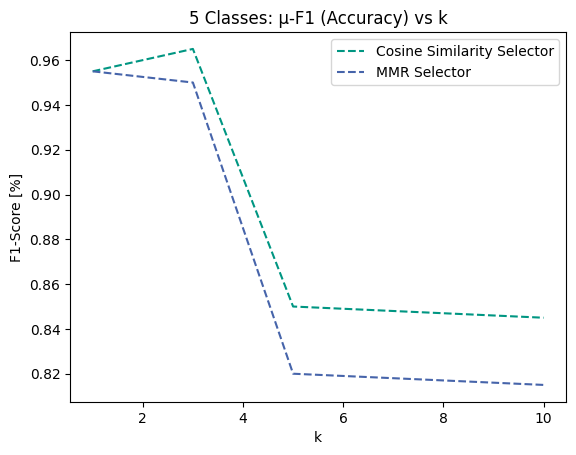

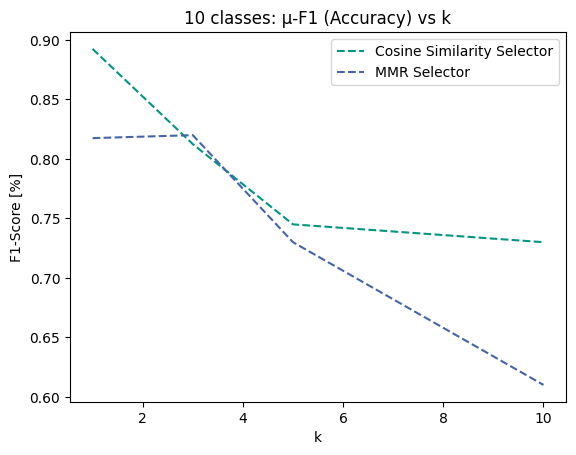

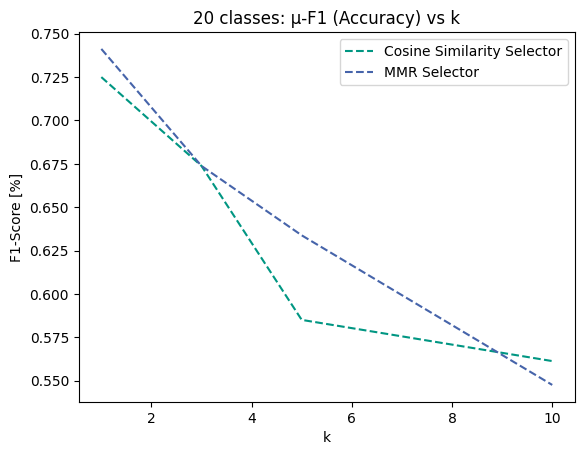

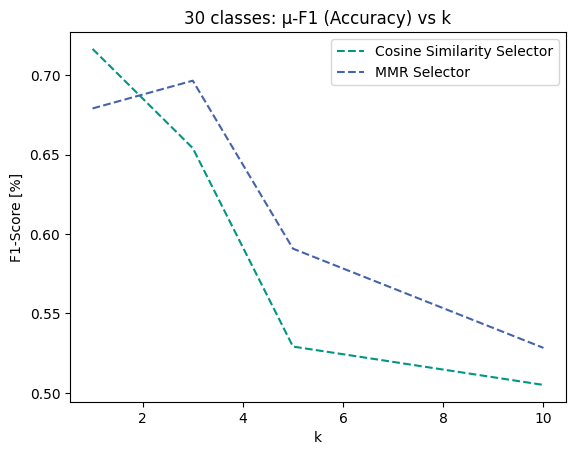

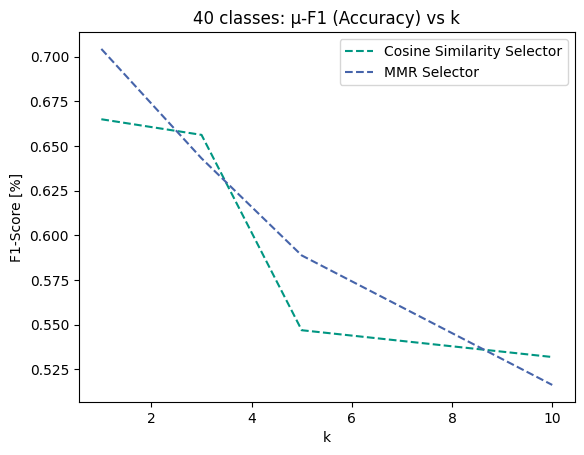

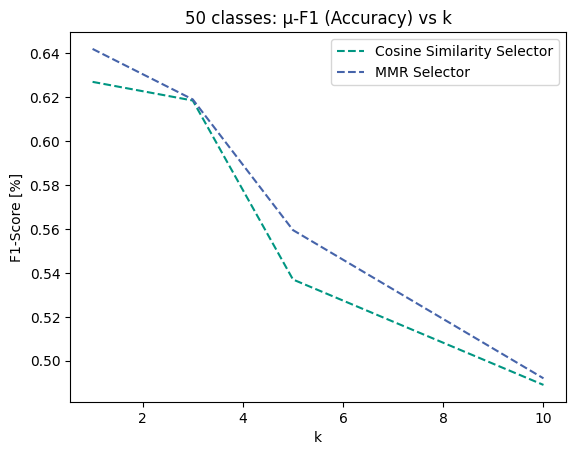

In [18]:
#plot for 5 classes k on the x axis and accuracy on the y axis
plt.plot([1,3,5,10], [report_classes_5_faiss_1["accuracy"], report_classes_5_faiss_3["accuracy"], report_classes_5_faiss_5["accuracy"], report_classes_5_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([1,3,5,10], [report_mmr_classes_5_faiss_1["accuracy"], report_mmr_classes_5_faiss_3["accuracy"], report_mmr_classes_5_faiss_5["accuracy"], report_mmr_classes_5_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.xlabel("k")
plt.ylabel("F1-Score [%]")
plt.title("5 Classes: µ-F1 (Accuracy) vs k")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_k_5_classes.png")
plt.show()

#plot for 10 classes k on the x axis and accuracy on the y axis
plt.plot([1,3,5,10], [report_classes_10_faiss_1["accuracy"], report_classes_10_faiss_3["accuracy"], report_classes_10_faiss_5["accuracy"], report_classes_10_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([1,3,5,10], [report_mmr_classes_10_faiss_1["accuracy"], report_mmr_classes_10_faiss_3["accuracy"], report_mmr_classes_10_faiss_5["accuracy"], report_mmr_classes_10_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.xlabel("k")
plt.ylabel("F1-Score [%]")
plt.title("10 classes: µ-F1 (Accuracy) vs k")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_k_10_classes.png")
plt.show()

#plot for 20 classes k on the x axis and accuracy on the y axis
plt.plot([1,3,5,10], [report_classes_20_faiss_1["accuracy"], report_classes_20_faiss_3["accuracy"], report_classes_20_faiss_5["accuracy"], report_classes_20_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([1,3,5,10], [report_mmr_classes_20_faiss_1["accuracy"], report_mmr_classes_20_faiss_3["accuracy"], report_mmr_classes_20_faiss_5["accuracy"], report_mmr_classes_20_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.xlabel("k")
plt.ylabel("F1-Score [%]")
plt.title("20 classes: µ-F1 (Accuracy) vs k")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_k_20_classes.png")
plt.show()

#plot for 30 classes k on the x axis and accuracy on the y axis
plt.plot([1,3,5,10], [report_classes_30_faiss_1["accuracy"], report_classes_30_faiss_3["accuracy"], report_classes_30_faiss_5["accuracy"], report_classes_30_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([1,3,5,10], [report_mmr_classes_30_faiss_1["accuracy"], report_mmr_classes_30_faiss_3["accuracy"], report_mmr_classes_30_faiss_5["accuracy"], report_mmr_classes_30_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.xlabel("k")
plt.ylabel("F1-Score [%]")
plt.title("30 classes: µ-F1 (Accuracy) vs k")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_k_30_classes.png")
plt.show()

#plot for 40 classes k on the x axis and accuracy on the y axis
plt.plot([1,3,5,10], [report_classes_40_faiss_1["accuracy"], report_classes_40_faiss_3["accuracy"], report_classes_40_faiss_5["accuracy"], report_classes_40_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([1,3,5,10], [report_mmr_classes_40_faiss_1["accuracy"], report_mmr_classes_40_faiss_3["accuracy"], report_mmr_classes_40_faiss_5["accuracy"], report_mmr_classes_40_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.xlabel("k")
plt.ylabel("F1-Score [%]")
plt.title("40 classes: µ-F1 (Accuracy) vs k")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_k_40_classes.png")
plt.show()

#plot for 50 classes k on the x axis and accuracy on the y axis
plt.plot([1,3,5,10], [report_classes_50_faiss_1["accuracy"], report_classes_50_faiss_3["accuracy"], report_classes_50_faiss_5["accuracy"], report_classes_50_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([1,3,5,10], [report_mmr_classes_50_faiss_1["accuracy"], report_mmr_classes_50_faiss_3["accuracy"], report_mmr_classes_50_faiss_5["accuracy"], report_mmr_classes_50_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.xlabel("k")
plt.ylabel("F1-Score [%]")
plt.title("50 classes: µ-F1 (Accuracy) vs k")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_k_50_classes.png")
plt.show()


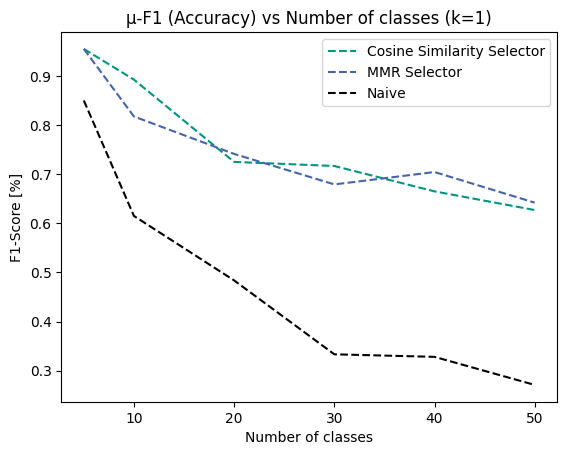

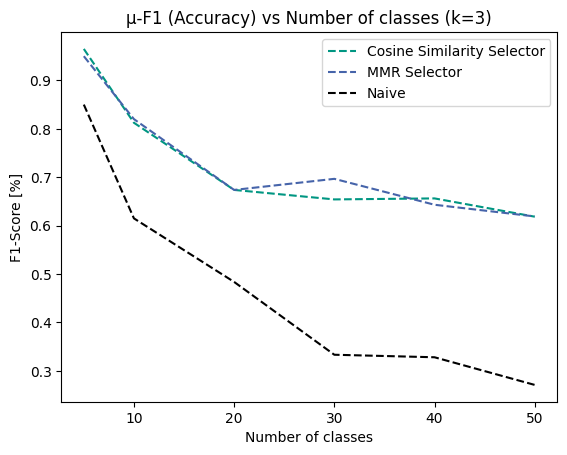

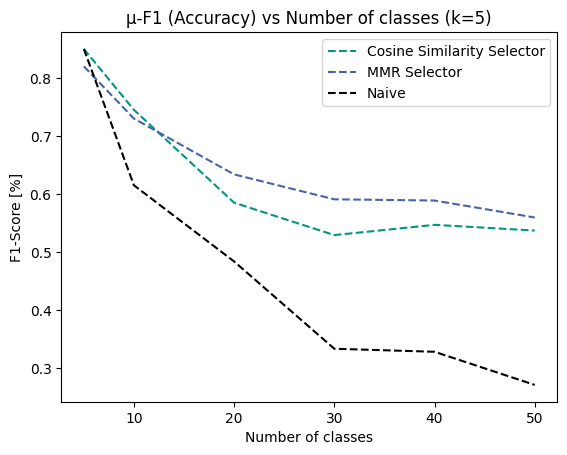

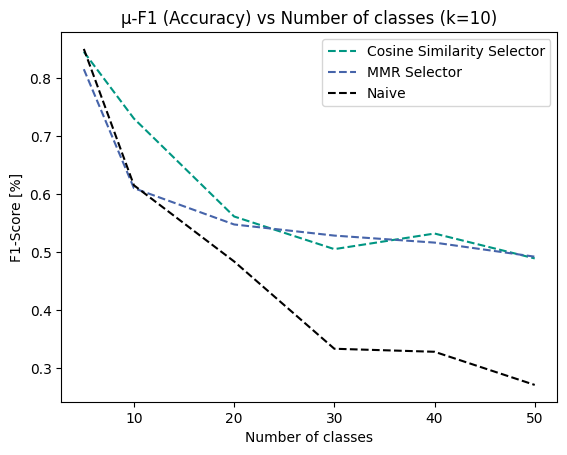

In [19]:
# compare naive vs cosine similarity selector vs mmr selector across all classes for k=1
plt.plot([5,10,20,30,40,50], [report_classes_5_faiss_1["accuracy"], report_classes_10_faiss_1["accuracy"], report_classes_20_faiss_1["accuracy"], report_classes_30_faiss_1["accuracy"], report_classes_40_faiss_1["accuracy"], report_classes_50_faiss_1["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], [report_mmr_classes_5_faiss_1["accuracy"], report_mmr_classes_10_faiss_1["accuracy"], report_mmr_classes_20_faiss_1["accuracy"], report_mmr_classes_30_faiss_1["accuracy"], report_mmr_classes_40_faiss_1["accuracy"], report_mmr_classes_50_faiss_1["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="Naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes (k=1)")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_mmr_cs_1.png")
plt.show()

# compare naive vs cosine similarity selector vs mmr selector across all classes for k=3
plt.plot([5,10,20,30,40,50], [report_classes_5_faiss_3["accuracy"], report_classes_10_faiss_3["accuracy"], report_classes_20_faiss_3["accuracy"], report_classes_30_faiss_3["accuracy"], report_classes_40_faiss_3["accuracy"], report_classes_50_faiss_3["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], [report_mmr_classes_5_faiss_3["accuracy"], report_mmr_classes_10_faiss_3["accuracy"], report_mmr_classes_20_faiss_3["accuracy"], report_mmr_classes_30_faiss_3["accuracy"], report_mmr_classes_40_faiss_3["accuracy"], report_mmr_classes_50_faiss_3["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="Naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes (k=3)")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_mmr_cs_3.png")
plt.show()

# compare naive vs cosine similarity selector vs mmr selector across all classes for k=5
plt.plot([5,10,20,30,40,50], [report_classes_5_faiss_5["accuracy"], report_classes_10_faiss_5["accuracy"], report_classes_20_faiss_5["accuracy"], report_classes_30_faiss_5["accuracy"], report_classes_40_faiss_5["accuracy"], report_classes_50_faiss_5["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], [report_mmr_classes_5_faiss_5["accuracy"], report_mmr_classes_10_faiss_5["accuracy"], report_mmr_classes_20_faiss_5["accuracy"], report_mmr_classes_30_faiss_5["accuracy"], report_mmr_classes_40_faiss_5["accuracy"], report_mmr_classes_50_faiss_5["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="Naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes (k=5)")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_mmr_cs_5.png")
plt.show()

# compare naive vs cosine similarity selector vs mmr selector across all classes for k=10
plt.plot([5,10,20,30,40,50], [report_classes_5_faiss_10["accuracy"], report_classes_10_faiss_10["accuracy"], report_classes_20_faiss_10["accuracy"], report_classes_30_faiss_10["accuracy"], report_classes_40_faiss_10["accuracy"], report_classes_50_faiss_10["accuracy"]], label="Cosine Similarity Selector", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], [report_mmr_classes_5_faiss_10["accuracy"], report_mmr_classes_10_faiss_10["accuracy"], report_mmr_classes_20_faiss_10["accuracy"], report_mmr_classes_30_faiss_10["accuracy"], report_mmr_classes_40_faiss_10["accuracy"], report_mmr_classes_50_faiss_10["accuracy"]], label="MMR Selector", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="Naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes (k=10)")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_mmr_cs_10.png")
plt.show()


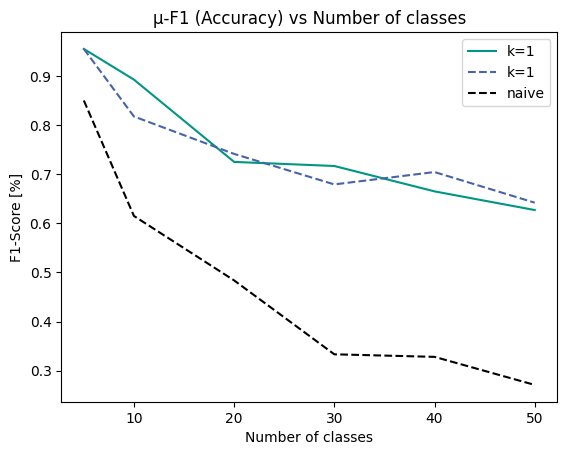

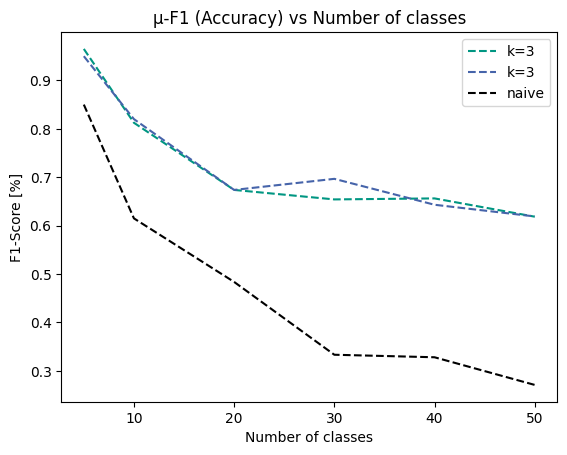

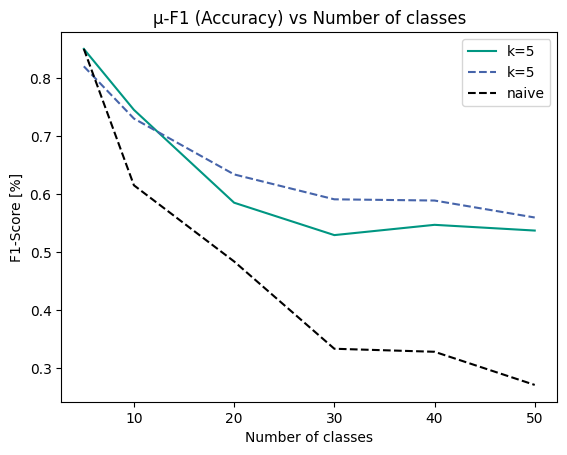

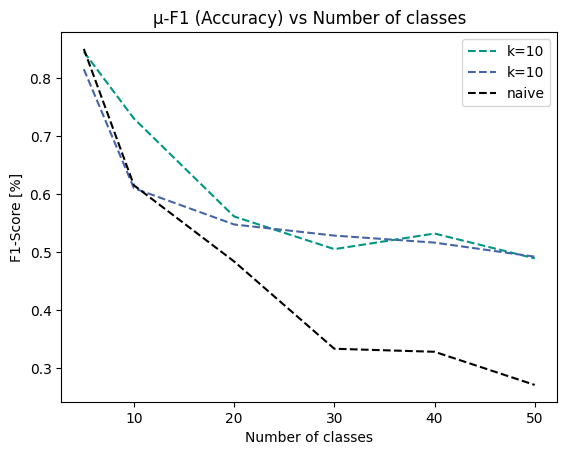

/var/folders/m6/4_p41bcx58jddx_zhmmqd_v00000gn/T/ipykernel_2666/3233208717.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


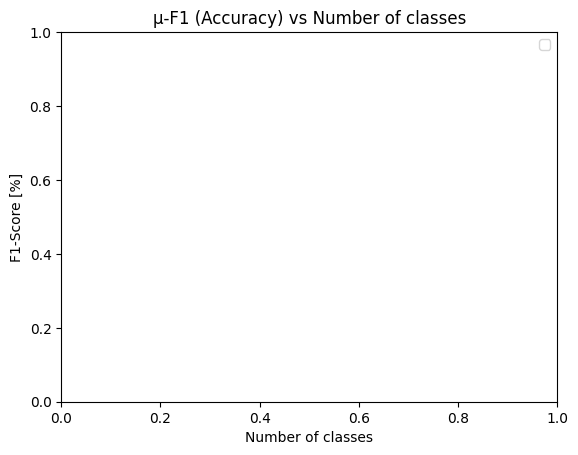

In [20]:
#plot accuracies vs number of classes for all faiss
micro_f1_scores_faiss_1 = [report_classes_5_faiss_1["accuracy"], report_classes_10_faiss_1["accuracy"], report_classes_20_faiss_1["accuracy"], report_classes_30_faiss_1["accuracy"], report_classes_40_faiss_1["accuracy"], report_classes_50_faiss_1["accuracy"]]
micro_f1_scores_faiss_3 = [report_classes_5_faiss_3["accuracy"], report_classes_10_faiss_3["accuracy"], report_classes_20_faiss_3["accuracy"], report_classes_30_faiss_3["accuracy"], report_classes_40_faiss_3["accuracy"], report_classes_50_faiss_3["accuracy"]]
micro_f1_scores_faiss_5 = [report_classes_5_faiss_5["accuracy"], report_classes_10_faiss_5["accuracy"], report_classes_20_faiss_5["accuracy"], report_classes_30_faiss_5["accuracy"], report_classes_40_faiss_5["accuracy"], report_classes_50_faiss_5["accuracy"]]
micro_f1_scores_faiss_10 = [report_classes_5_faiss_10["accuracy"], report_classes_10_faiss_10["accuracy"], report_classes_20_faiss_10["accuracy"], report_classes_30_faiss_10["accuracy"], report_classes_40_faiss_10["accuracy"], report_classes_50_faiss_10["accuracy"]]
micro_f1_scores = [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]]

micro_mmr_f1_scores_faiss_1 = [report_mmr_classes_5_faiss_1["accuracy"], report_mmr_classes_10_faiss_1["accuracy"], report_mmr_classes_20_faiss_1["accuracy"], report_mmr_classes_30_faiss_1["accuracy"], report_mmr_classes_40_faiss_1["accuracy"], report_mmr_classes_50_faiss_1["accuracy"]]
micro_mmr_f1_scores_faiss_3 = [report_mmr_classes_5_faiss_3["accuracy"], report_mmr_classes_10_faiss_3["accuracy"], report_mmr_classes_20_faiss_3["accuracy"], report_mmr_classes_30_faiss_3["accuracy"], report_mmr_classes_40_faiss_3["accuracy"], report_mmr_classes_50_faiss_3["accuracy"]]
micro_mmr_f1_scores_faiss_5 = [report_mmr_classes_5_faiss_5["accuracy"], report_mmr_classes_10_faiss_5["accuracy"], report_mmr_classes_20_faiss_5["accuracy"], report_mmr_classes_30_faiss_5["accuracy"], report_mmr_classes_40_faiss_5["accuracy"], report_mmr_classes_50_faiss_5["accuracy"]]
micro_mmr_f1_scores_faiss_10 = [report_mmr_classes_5_faiss_10["accuracy"], report_mmr_classes_10_faiss_10["accuracy"], report_mmr_classes_20_faiss_10["accuracy"], report_mmr_classes_30_faiss_10["accuracy"], report_mmr_classes_40_faiss_10["accuracy"], report_mmr_classes_50_faiss_10["accuracy"]]

plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_1, label="k=1", color="#009682", linestyle="-")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_1, label="k=1", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_number_classes_.png")
plt.show()


plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_3, label="k=3", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_3, label="k=3", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_number_classes_faiss.png")
plt.show()

plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_5, label="k=5", color="#009682", linestyle="-")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_5, label="k=5", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_number_classes_faiss.png")
plt.show()

plt.plot([5,10,20,30,40,50], micro_f1_scores_faiss_10, label="k=10", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_mmr_f1_scores_faiss_10, label="k=10", color="#4664aa", linestyle="--")
plt.plot([5,10,20,30,40,50], micro_f1_scores, label="naive", color="#000000", linestyle="--")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/performance_vs_number_classes_faiss.png")
plt.show()



plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("µ-F1 (Accuracy) vs Number of classes")
plt.legend()
plt.gcf().savefig("enhanced_few_shot/figs/performance_vs_number_classes_faiss.png")
plt.show()


In [21]:
print(predictions_5["prompt"][0])

Your task is to classify a given text by assigning a label from the examples to it, Please ONLY respond with the label as a number. ONLY use labels you see in the examples, don't make up own labels.
Here are some examples:

input: Why would I be charged a fee for card payment?
output: 15

input: Why are you declining my payment? Everything was fine.
output: 25

input: I would like to change my pin.
output: 21

input: I topped up but the app did not accept it.
output: 59

input: My bank transfer is still not showing up in my account.
output: 5

input: I payed with a card and was charged an extra fee.
output:


In [36]:
print(predictions_classes_5_faiss_3["prompt"][80])

Your task is to classify a given text by assigning a label from the examples to it, Please ONLY respond with the label as a number. ONLY use labels you see in the examples, don't make up own labels.
Here are some examples:

input: How can I modify my details?
output: 30

input: Can you help my fix my contactless?
output: 23

input: what is the process for setting up a pin
output: 38

input: I no longer live at my address on file, how do I change it?.
output:


In [58]:
#get all the rows where the prediction is wrong 
wrong_predictions_50 = predictions_50[predictions_50["prediction"] != predictions_50["label"]]
wrong_predictions_40 = predictions_40[predictions_40["prediction"] != predictions_40["label"]]
wrong_predictions_30 = predictions_30[predictions_30["prediction"] != predictions_30["label"]]
wrong_predictions_20 = predictions_20[predictions_20["prediction"] != predictions_20["label"]]
wrong_predictions_10 = predictions_10[predictions_10["prediction"] != predictions_10["label"]]
wrong_predictions_5 = predictions_5[predictions_5["prediction"] != predictions_5["label"]]

#get the prompt of the first wrong prediction and search within that string for the last 3 numbers
# print(wrong_predictions_5["prompt"][0])
# print(wrong_predictions_10["prompt"][0])
# print(wrong_predictions_20["prompt"][0])
# print(wrong_predictions_30["prompt"][0])
# print(wrong_predictions_40["prompt"][0])
# print(wrong_predictions_50["prompt"][0])

# get the prompt of the first wrong prediction and search within that string for the last 3 numbers



Wrong Predictions is one of the last three seen number
5 Classes: 19
10 Classes: 61
20 Classes: 65
30 Classes: 294
40 Classes: 93
50 Classes: 419


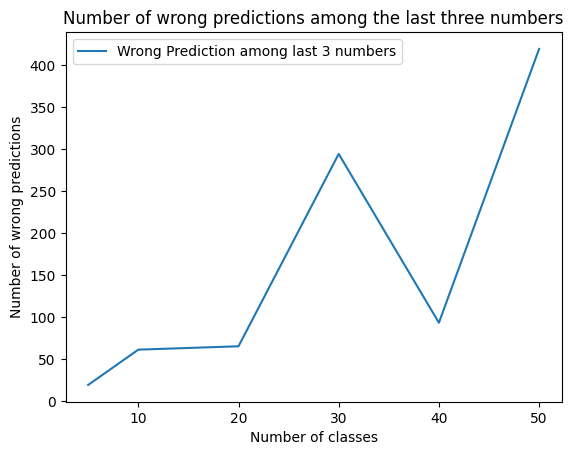

In [85]:
import re
print("Wrong Predictions is one of the last three seen number")
prompt_5 = wrong_predictions_5["prompt"].iloc[0]
last_three_numbers_5 = re.findall(r'\d+', prompt_5)[-3:]
value_counts_5 = wrong_predictions_5["prediction"].value_counts()
is_in_last_three_numbers_5 = [int(value_counts_5.get(float(key), 0)) for key in last_three_numbers_5]
wrong_prediction_among_last_three_numbers_5 = np.array(is_in_last_three_numbers_5).sum()
print(f"5 Classes: {wrong_prediction_among_last_three_numbers_5}")

prompt_10 = wrong_predictions_10["prompt"].iloc[0]
last_three_numbers_10 = re.findall(r'\d+', prompt_10)[-3:]
value_counts_10 = wrong_predictions_10["prediction"].value_counts()
is_in_last_three_numbers_10 = [int(value_counts_10.get(float(key), 0)) for key in last_three_numbers_10]
wrong_prediction_among_last_three_numbers_10 = np.array(is_in_last_three_numbers_10).sum()
print(f"10 Classes: {wrong_prediction_among_last_three_numbers_10}")

prompt_20 = wrong_predictions_20["prompt"].iloc[0]
last_three_numbers_20 = re.findall(r'\d+', prompt_20)[-3:]
value_counts_20 = wrong_predictions_20["prediction"].value_counts()
is_in_last_three_numbers_20 = [int(value_counts_20.get(float(key), 0)) for key in last_three_numbers_20]
wrong_prediction_among_last_three_numbers_20 = np.array(is_in_last_three_numbers_20).sum()
print(f"20 Classes: {wrong_prediction_among_last_three_numbers_20}")

prompt_30 = wrong_predictions_30["prompt"].iloc[0]
last_three_numbers_30 = re.findall(r'\d+', prompt_30)[-3:]
value_counts_30 = wrong_predictions_30["prediction"].value_counts()
is_in_last_three_numbers_30 = [int(value_counts_30.get(float(key), 0)) for key in last_three_numbers_30]
wrong_prediction_among_last_three_numbers_30 = np.array(is_in_last_three_numbers_30).sum()
print(f"30 Classes: {wrong_prediction_among_last_three_numbers_30}")

prompt_40 = wrong_predictions_40["prompt"].iloc[0]
last_three_numbers_40 = re.findall(r'\d+', prompt_40)[-3:]
value_counts_40 = wrong_predictions_40["prediction"].value_counts()
is_in_last_three_numbers_40 = [int(value_counts_40.get(float(key), 0)) for key in last_three_numbers_40]
wrong_prediction_among_last_three_numbers_40 = np.array(is_in_last_three_numbers_40).sum()
print(f"40 Classes: {wrong_prediction_among_last_three_numbers_40}")

prompt_50 = wrong_predictions_50["prompt"].iloc[0]
last_three_numbers_50 = re.findall(r'\d+', prompt_50)[-3:]
value_counts_50 = wrong_predictions_50["prediction"].value_counts()
is_in_last_three_numbers_50 = [int(value_counts_50.get(float(key), 0)) for key in last_three_numbers_50]
wrong_prediction_among_last_three_numbers_50 = np.array(is_in_last_three_numbers_50).sum()
print(f"50 Classes: {wrong_prediction_among_last_three_numbers_50}")



# plot this 
plt.plot([5,10,20,30,40,50], [wrong_prediction_among_last_three_numbers_5, wrong_prediction_among_last_three_numbers_10, wrong_prediction_among_last_three_numbers_20, wrong_prediction_among_last_three_numbers_30, wrong_prediction_among_last_three_numbers_40, wrong_prediction_among_last_three_numbers_50], label="Wrong Prediction among last 3 numbers")
plt.xlabel("Number of classes")
plt.ylabel("Number of wrong predictions")
plt.title("Number of wrong predictions among the last three numbers")
plt.legend()
plt.gcf().savefig("mmr_few_shot/figs/wrong_predictions_last_three_numbers.png")
plt.show()


In [79]:
re.findall(r'\d+', prompt_5)[-3:]

['21', '59', '5']

In [80]:
value_counts_5

prediction
5.0     18
15.0     5
25.0     2
21.0     1
Name: count, dtype: int64

In [82]:
print(prompt_5)

Your task is to classify a given text by assigning a label from the examples to it, Please ONLY respond with the label as a number. ONLY use labels you see in the examples, don't make up own labels.
Here are some examples:

input: Why would I be charged a fee for card payment?
output: 15

input: Why are you declining my payment? Everything was fine.
output: 25

input: I would like to change my pin.
output: 21

input: I topped up but the app did not accept it.
output: 59

input: My bank transfer is still not showing up in my account.
output: 5

input: I show another charge on my card from when I used it, why?.
output:


In [70]:
last_three_numbers_30

['2', '11', '32']

In [71]:
value_counts_30

prediction
24.0    293
46.0    112
49.0     88
75.0     61
12.0     59
32.0     39
36.0     31
44.0     11
30.0      9
43.0      5
10.0      4
48.0      4
47.0      1
19.0      1
22.0      1
54.0      1
74.0      1
67.0      1
Name: count, dtype: int64

In [66]:
np.array(is_in_last_three_numbers_5).sum()

8

In [83]:
wrong_predictions

,text,label,prediction,inference_time,input_tokens_length,prompt_length,prompt
0,How do I locate my card?,11,41.0,2.820492,1094,4227,Your task is to classify a given text by assig...
1,"I still have not received my new card, I order...",11,41.0,1.783185,1102,4268,Your task is to classify a given text by assig...
2,I ordered a card but it has not arrived. Help ...,11,41.0,1.787557,1100,4256,Your task is to classify a given text by assig...
3,Is there a way to know when my card will arrive?,11,NaN,1.790178,1099,4251,Your task is to classify a given text by assig...
4,My card has not arrived yet.,11,41.0,1.784917,1093,4231,Your task is to classify a given text by assig...
...,...,...,...,...,...,...,...
1991,Where do you support?,24,32.0,1.818816,1092,4224,Your task is to classify a given text by assig...
1993,What countries do you currently do business in?,24,32.0,1.816048,1096,4250,Your task is to classify a given text by assig...
1996,How many countries do you support?,24,69.0,1.819312,1094,4237,Your task is to classify a given text by assig...
1997,What countries do you do business in?,24,32.0,1.820781,1095,4240,Your task is to classify a given text by assig...


In [37]:
print(len(predictions_20))
print(len(wrong_predictions))
print(len(wrong_predictions)/len(predictions_5) * 100)
#print(f"number of nans: {wrong_predictions.isna().sum()}, in percentage: {wrong_predictions.isna().sum()/len(wrong_predictions) * 100}")
#print(f"number of 5 in wrong predictions: {wrong_predictions['prediction'].value_counts()[5.0]}, in percentage: {wrong_predictions['prediction'].value_counts()[5.0]/len(wrong_predictions) * 100}")
wrong_predictions['prediction'].value_counts()

800
1458
729.0


prediction
69.0    258
14.0    180
41.0    180
16.0    175
24.0    161
17.0     82
34.0     79
32.0     57
73.0     35
36.0     28
44.0     26
49.0     21
54.0     18
30.0     17
46.0     14
38.0     14
40.0     14
19.0      9
29.0      7
33.0      5
20.0      3
67.0      3
47.0      2
0.0       1
13.0      1
1.0       1
52.0      1
Name: count, dtype: int64

In [85]:
print(wrong_predictions["prompt"].iloc[0])

Your task is to classify a given text by assigning a label from the examples to it, Please ONLY respond with the label as a number. ONLY use labels you see in the examples, don't make up own labels.
Here are some examples:

input: My card still hasn't arrived after 2 weeks. Is it lost?
output: 11

input: I found my card, can I add it to the app?
output: 13

input: Where do you get your exchange rates from?
output: 32

input: I purchased an item and the exchange rate I was given was incorrect.
output: 17

input: What would be the reason there's an extra fee on my statement?
output: 34

input: Hey, my card was declined at an ATM in the city centre theatre. My account says the transaction is pending, though. I didn't get the money, though, so what does that mean?
output: 46

input: Can I hold money in other currencies?
output: 36

input: How can I resolve a problem where my card won't go through at all?
output: 14

input: I need AUD not GBP, how do I change it?
output: 33

input: I need h

In [37]:
wrong_predictions = predictions_30[predictions_30["prediction"] != predictions_30["label"]]
wrong_predictions['prediction'].value_counts()

prediction
24.0    293
46.0    112
49.0     88
75.0     61
12.0     59
32.0     39
36.0     31
44.0     11
30.0      9
43.0      5
10.0      4
48.0      4
47.0      1
19.0      1
22.0      1
54.0      1
74.0      1
67.0      1
Name: count, dtype: int64

In [41]:
print(wrong_predictions["prompt"][0])

Your task is to classify a given text by assigning a label from the examples to it, Please ONLY respond with the label as a number. ONLY use labels you see in the examples, don't make up own labels.
Here are some examples:

input: My card still hasn't arrived after 2 weeks. Is it lost?
output: 11

input: Where do you get your exchange rates from?
output: 32

input: Hey, my card was declined at an ATM in the city centre theatre. My account says the transaction is pending, though. I didn't get the money, though, so what does that mean?
output: 46

input: Can I hold money in other currencies?
output: 36

input: How long will it take for the card to arrive?
output: 12

input: I'v exhausted all the of times I can try my PIN
output: 49

input: I topped up by card a while ago and it's still pending, surely it should be done by now?
output: 47

input: I tried to get $100 but I just got $20
output: 75

input: Why would I be charged a fee for card payment?
output: 15

input: How can I use Americ

In [53]:
predictions_5["input_tokens_length"].mean() - predictions_classes_5_faiss_1["input_tokens_length"].mean()

71.92499999999998

In [54]:
predictions_50["prompt_length"].mean() - predictions_classes_50_faiss_1["prompt_length"].mean()

3698.0850000000005

In [52]:
predictions_50["prompt_length"].mean()

4257.2205